In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

37


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.51073 stdev: 0.09261
Best fitness: 0.72727 - size: (2, 13) - species 2 - id 151
Average adjusted fitness: 0.204
Mean genetic distance 2.887, standard deviation 0.485
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 21.477 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55757 stdev: 0.09125
Best fitness: 0.74335 - size: (2, 13) - species 19 - id 356
Average adjusted fitness: 0.253
Mean genetic distance 3.034, standard deviation 0.503
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 20.360 sec (20.919 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57937 stdev: 0.09106
Best fitness: 0.77365 - size: (3, 14) - species 19 - id 541
Average adjusted fitness: 0.290
Mean genetic distance 3.058, standard deviation 0.486
Population of 202 members in 31 species
Total exti

Population's average fitness: 0.62939 stdev: 0.13548
Best fitness: 0.79468 - size: (6, 22) - species 18 - id 1283
Average adjusted fitness: 0.326
Mean genetic distance 3.153, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 31.757 sec (26.821 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63370 stdev: 0.13475
Best fitness: 0.79468 - size: (6, 22) - species 18 - id 1283
Average adjusted fitness: 0.332
Mean genetic distance 3.158, standard deviation 0.475
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 29.551 sec (27.731 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63586 stdev: 0.12923
Best fitness: 0.79468 - size: (6, 22) - species 18 - id 1283
Average adjusted fitness: 0.326
Mean genetic distance 3.151, standard deviation 0.481
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 29.520 sec (28.409 average)

 

Population's average fitness: 0.67800 stdev: 0.19063
Best fitness: 0.84539 - size: (3, 15) - species 4 - id 371
Average adjusted fitness: 0.464
Mean genetic distance 3.056, standard deviation 0.475
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 33.052 sec (24.554 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67992 stdev: 0.19024
Best fitness: 0.84601 - size: (3, 17) - species 4 - id 823
Average adjusted fitness: 0.470
Mean genetic distance 3.102, standard deviation 0.483
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 36.883 sec (27.019 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69099 stdev: 0.18834
Best fitness: 0.84601 - size: (3, 17) - species 4 - id 823
Average adjusted fitness: 0.509
Mean genetic distance 3.118, standard deviation 0.472
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.744 sec (26.474 average)

 ****** R

Population's average fitness: 0.66750 stdev: 0.09717
Best fitness: 0.82127 - size: (6, 19) - species 2 - id 1858
Average adjusted fitness: 0.278
Mean genetic distance 3.206, standard deviation 0.480
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.143 sec (21.299 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65529 stdev: 0.11256
Best fitness: 0.82127 - size: (6, 19) - species 2 - id 1858
Average adjusted fitness: 0.276
Mean genetic distance 3.201, standard deviation 0.478
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.789 sec (21.548 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66031 stdev: 0.10596
Best fitness: 0.82127 - size: (6, 19) - species 2 - id 1858
Average adjusted fitness: 0.282
Mean genetic distance 3.194, standard deviation 0.468
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 22.861 sec (21.763 average)
numbe

Population's average fitness: 0.66771 stdev: 0.09093
Best fitness: 0.76747 - size: (5, 19) - species 4 - id 805
Average adjusted fitness: 0.368
Mean genetic distance 3.211, standard deviation 0.465
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 21.326 sec (19.736 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66487 stdev: 0.09920
Best fitness: 0.76747 - size: (5, 19) - species 4 - id 805
Average adjusted fitness: 0.418
Mean genetic distance 3.220, standard deviation 0.470
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 21.533 sec (19.961 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67107 stdev: 0.08775
Best fitness: 0.77056 - size: (4, 19) - species 14 - id 1291
Average adjusted fitness: 0.374
Mean genetic distance 3.227, standard deviation 0.480
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 21.566 sec (20.139 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.45324 stdev: 0.15028
Best fitness: 0.73840 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.195
Mean genetic distance 2.910, standard deviation 0.443
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.377 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53538 stdev: 0.15526
Best fitness: 0.76129 - size: (2, 13) - species 20 - id 361
Average adjusted fitness: 0.273
Mean genetic distance 2.943, standard deviation 0.462
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 18.549 sec (17.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59683 stdev: 0.14689
Best fitness: 0.79530 - size: (3, 15) - species 8 - id 548
Average adjusted fitness: 0.267
Mean genetic distance 2.990, standard deviation 0.504
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.822 sec (18.

Population's average fitness: 0.63881 stdev: 0.11366
Best fitness: 0.84477 - size: (5, 21) - species 23 - id 1419
Average adjusted fitness: 0.263
Mean genetic distance 3.071, standard deviation 0.475
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 22.502 sec (20.795 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62694 stdev: 0.11854
Best fitness: 0.84477 - size: (5, 21) - species 23 - id 1419
Average adjusted fitness: 0.276
Mean genetic distance 3.075, standard deviation 0.490
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 22.430 sec (21.246 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64012 stdev: 0.11911
Best fitness: 0.84477 - size: (5, 21) - species 23 - id 1419
Average adjusted fitness: 0.328
Mean genetic distance 3.075, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 23.129 sec (21.712 average)

 

Population's average fitness: 0.54210 stdev: 0.05333
Best fitness: 0.70192 - size: (4, 16) - species 31 - id 604
Average adjusted fitness: 0.128
Mean genetic distance 3.069, standard deviation 0.457
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 19.640 sec (18.794 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54729 stdev: 0.05086
Best fitness: 0.70192 - size: (4, 16) - species 31 - id 604
Average adjusted fitness: 0.114
Mean genetic distance 3.104, standard deviation 0.463
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 20.162 sec (19.068 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55343 stdev: 0.05625
Best fitness: 0.70192 - size: (4, 16) - species 31 - id 604
Average adjusted fitness: 0.120
Mean genetic distance 3.095, standard deviation 0.465
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.198 sec (19.423 average)

 *****

Population's average fitness: 0.68673 stdev: 0.10965
Best fitness: 0.81385 - size: (4, 15) - species 1 - id 1761
Average adjusted fitness: 0.383
Mean genetic distance 3.192, standard deviation 0.471
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 22.132 sec (21.242 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67798 stdev: 0.11505
Best fitness: 0.81385 - size: (4, 15) - species 1 - id 1761
Average adjusted fitness: 0.374
Mean genetic distance 3.195, standard deviation 0.468
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 23.097 sec (21.585 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69656 stdev: 0.09762
Best fitness: 0.81385 - size: (4, 15) - species 1 - id 1761
Average adjusted fitness: 0.391
Mean genetic distance 3.207, standard deviation 0.459
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 22.152 sec (21.697 average)
numbe

Population's average fitness: 0.73913 stdev: 0.14441
Best fitness: 0.87260 - size: (7, 23) - species 13 - id 1068
Average adjusted fitness: 0.522
Mean genetic distance 3.090, standard deviation 0.486
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 21.498 sec (20.174 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.75527 stdev: 0.13634
Best fitness: 0.87260 - size: (7, 23) - species 19 - id 1068
Average adjusted fitness: 0.543
Mean genetic distance 3.112, standard deviation 0.472
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 22.015 sec (20.404 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.75437 stdev: 0.12810
Best fitness: 0.87260 - size: (7, 23) - species 32 - id 1068
Average adjusted fitness: 0.534
Mean genetic distance 3.120, standard deviation 0.459
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 22.107 sec (20.593 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.48441 stdev: 0.10238
Best fitness: 0.71676 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.248
Mean genetic distance 2.973, standard deviation 0.487
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 17.794 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54163 stdev: 0.10253
Best fitness: 0.76500 - size: (2, 13) - species 16 - id 277
Average adjusted fitness: 0.283
Mean genetic distance 3.041, standard deviation 0.481
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 18.535 sec (18.164 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55604 stdev: 0.10618
Best fitness: 0.76809 - size: (4, 16) - species 25 - id 413
Average adjusted fitness: 0.288
Mean genetic distance 3.021, standard deviation 0.478
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 19.242 sec (18

Population's average fitness: 0.58331 stdev: 0.07469
Best fitness: 0.73284 - size: (3, 16) - species 38 - id 1200
Average adjusted fitness: 0.217
Mean genetic distance 3.142, standard deviation 0.508
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 21.809 sec (20.398 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58307 stdev: 0.07824
Best fitness: 0.73284 - size: (3, 16) - species 38 - id 1200
Average adjusted fitness: 0.239
Mean genetic distance 3.150, standard deviation 0.505
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 21.373 sec (20.782 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58954 stdev: 0.07584
Best fitness: 0.73284 - size: (3, 16) - species 38 - id 1200
Average adjusted fitness: 0.199
Mean genetic distance 3.176, standard deviation 0.512
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 21.372 sec (21.054 average)

 

Population's average fitness: 0.56775 stdev: 0.06696
Best fitness: 0.72604 - size: (3, 15) - species 24 - id 667
Average adjusted fitness: 0.196
Mean genetic distance 2.935, standard deviation 0.500
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.006 sec (18.830 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56602 stdev: 0.07463
Best fitness: 0.72604 - size: (3, 15) - species 24 - id 667
Average adjusted fitness: 0.214
Mean genetic distance 2.947, standard deviation 0.491
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 20.061 sec (19.076 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57610 stdev: 0.07018
Best fitness: 0.74644 - size: (4, 18) - species 24 - id 964
Average adjusted fitness: 0.211
Mean genetic distance 2.946, standard deviation 0.490
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 21.313 sec (19.449 average)

 *****

Population's average fitness: 0.63853 stdev: 0.09546
Best fitness: 0.80272 - size: (7, 24) - species 26 - id 1772
Average adjusted fitness: 0.286
Mean genetic distance 3.046, standard deviation 0.490
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 23.404 sec (21.880 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63575 stdev: 0.09625
Best fitness: 0.80272 - size: (7, 24) - species 26 - id 1772
Average adjusted fitness: 0.210
Mean genetic distance 3.044, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 23.133 sec (22.178 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63831 stdev: 0.09340
Best fitness: 0.80272 - size: (7, 24) - species 26 - id 1772
Average adjusted fitness: 0.179
Mean genetic distance 3.053, standard deviation 0.490
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 23.955 sec (22.505 average)
nu

Population's average fitness: 0.59242 stdev: 0.08805
Best fitness: 0.72171 - size: (4, 17) - species 6 - id 1158
Average adjusted fitness: 0.247
Mean genetic distance 3.141, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 21.628 sec (20.184 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58927 stdev: 0.09093
Best fitness: 0.72480 - size: (4, 20) - species 6 - id 1310
Average adjusted fitness: 0.246
Mean genetic distance 3.200, standard deviation 0.502
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 21.812 sec (20.388 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60222 stdev: 0.08852
Best fitness: 0.74088 - size: (6, 21) - species 31 - id 1440
Average adjusted fitness: 0.211
Mean genetic distance 3.216, standard deviation 0.488
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.292 sec (20.488 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49150 stdev: 0.15431
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.267
Mean genetic distance 2.935, standard deviation 0.522
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56275 stdev: 0.15304
Best fitness: 0.79963 - size: (3, 15) - species 5 - id 326
Average adjusted fitness: 0.270
Mean genetic distance 3.001, standard deviation 0.509
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.634 sec (18.000 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59111 stdev: 0.15457
Best fitness: 0.81509 - size: (2, 14) - species 21 - id 505
Average adjusted fitness: 0.305
Mean genetic distance 3.073, standard deviation 0.510
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.699 sec (18.56

Population's average fitness: 0.58520 stdev: 0.06716
Best fitness: 0.70625 - size: (4, 18) - species 4 - id 924
Average adjusted fitness: 0.147
Mean genetic distance 3.205, standard deviation 0.484
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 22.838 sec (20.797 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59274 stdev: 0.06425
Best fitness: 0.70625 - size: (4, 18) - species 4 - id 924
Average adjusted fitness: 0.174
Mean genetic distance 3.192, standard deviation 0.510
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 22.667 sec (21.305 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58651 stdev: 0.06638
Best fitness: 0.70625 - size: (4, 18) - species 4 - id 924
Average adjusted fitness: 0.135
Mean genetic distance 3.194, standard deviation 0.511
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 22.699 sec (21.698 average)

 ******

Population's average fitness: 0.62413 stdev: 0.15511
Best fitness: 0.85900 - size: (3, 15) - species 21 - id 333
Average adjusted fitness: 0.403
Mean genetic distance 3.019, standard deviation 0.507
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 19.642 sec (18.762 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63987 stdev: 0.15927
Best fitness: 0.85900 - size: (3, 15) - species 21 - id 333
Average adjusted fitness: 0.474
Mean genetic distance 3.057, standard deviation 0.491
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.158 sec (19.041 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64236 stdev: 0.15769
Best fitness: 0.86024 - size: (3, 13) - species 21 - id 960
Average adjusted fitness: 0.388
Mean genetic distance 3.061, standard deviation 0.480
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 20.893 sec (19.350 average)

 *****

Population's average fitness: 0.60553 stdev: 0.07859
Best fitness: 0.75448 - size: (6, 22) - species 32 - id 1820
Average adjusted fitness: 0.178
Mean genetic distance 3.211, standard deviation 0.477
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 22.420 sec (21.699 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60414 stdev: 0.08230
Best fitness: 0.75448 - size: (6, 22) - species 32 - id 1820
Average adjusted fitness: 0.209
Mean genetic distance 3.221, standard deviation 0.482
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 23.320 sec (22.085 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60905 stdev: 0.07918
Best fitness: 0.75448 - size: (6, 22) - species 32 - id 1820
Average adjusted fitness: 0.217
Mean genetic distance 3.198, standard deviation 0.471
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 22.895 sec (22.344 average)
nu

Population's average fitness: 0.60558 stdev: 0.10653
Best fitness: 0.81014 - size: (3, 15) - species 34 - id 621
Average adjusted fitness: 0.272
Mean genetic distance 3.203, standard deviation 0.508
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.785 sec (20.061 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62262 stdev: 0.09224
Best fitness: 0.81014 - size: (3, 15) - species 34 - id 621
Average adjusted fitness: 0.259
Mean genetic distance 3.190, standard deviation 0.494
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 22.061 sec (20.311 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62348 stdev: 0.09208
Best fitness: 0.81014 - size: (3, 15) - species 34 - id 621
Average adjusted fitness: 0.255
Mean genetic distance 3.180, standard deviation 0.484
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 22.713 sec (20.578 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50712 stdev: 0.04515
Best fitness: 0.64564 - size: (2, 13) - species 4 - id 82
Average adjusted fitness: 0.113
Mean genetic distance 2.912, standard deviation 0.466
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.278 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52445 stdev: 0.05352
Best fitness: 0.68707 - size: (3, 13) - species 4 - id 323
Average adjusted fitness: 0.187
Mean genetic distance 3.006, standard deviation 0.444
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.930 sec (18.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54079 stdev: 0.05813
Best fitness: 0.70748 - size: (4, 17) - species 6 - id 475
Average adjusted fitness: 0.122
Mean genetic distance 3.020, standard deviation 0.457
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.218 sec (18.80

Population's average fitness: 0.60995 stdev: 0.07610
Best fitness: 0.74768 - size: (3, 15) - species 19 - id 966
Average adjusted fitness: 0.287
Mean genetic distance 3.129, standard deviation 0.489
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 22.882 sec (20.712 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61414 stdev: 0.07752
Best fitness: 0.74768 - size: (3, 15) - species 19 - id 966
Average adjusted fitness: 0.231
Mean genetic distance 3.124, standard deviation 0.496
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 23.202 sec (21.288 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60751 stdev: 0.08650
Best fitness: 0.74768 - size: (3, 15) - species 19 - id 966
Average adjusted fitness: 0.245
Mean genetic distance 3.089, standard deviation 0.493
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.801 sec (21.664 average)

 ***

Population's average fitness: 0.56722 stdev: 0.07889
Best fitness: 0.75263 - size: (3, 17) - species 1 - id 654
Average adjusted fitness: 0.255
Mean genetic distance 3.087, standard deviation 0.522
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 20.039 sec (19.114 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57115 stdev: 0.07842
Best fitness: 0.75263 - size: (3, 17) - species 24 - id 654
Average adjusted fitness: 0.220
Mean genetic distance 3.039, standard deviation 0.518
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.935 sec (19.478 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58784 stdev: 0.08041
Best fitness: 0.75819 - size: (5, 20) - species 15 - id 984
Average adjusted fitness: 0.214
Mean genetic distance 3.094, standard deviation 0.508
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.343 sec (19.789 average)

 ******

Population's average fitness: 0.60498 stdev: 0.08777
Best fitness: 0.75448 - size: (5, 21) - species 6 - id 1961
Average adjusted fitness: 0.254
Mean genetic distance 3.153, standard deviation 0.530
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 23.838 sec (21.946 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60704 stdev: 0.08673
Best fitness: 0.75448 - size: (5, 21) - species 24 - id 1961
Average adjusted fitness: 0.203
Mean genetic distance 3.144, standard deviation 0.525
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.539 sec (22.160 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60476 stdev: 0.08672
Best fitness: 0.75448 - size: (5, 21) - species 24 - id 1961
Average adjusted fitness: 0.188
Mean genetic distance 3.168, standard deviation 0.514
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 23.372 sec (22.429 average)
num

Population's average fitness: 0.63187 stdev: 0.13464
Best fitness: 0.82127 - size: (4, 14) - species 17 - id 966
Average adjusted fitness: 0.348
Mean genetic distance 3.104, standard deviation 0.445
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 22.493 sec (20.313 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63483 stdev: 0.13812
Best fitness: 0.82127 - size: (4, 14) - species 17 - id 966
Average adjusted fitness: 0.356
Mean genetic distance 3.116, standard deviation 0.451
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 21.888 sec (20.509 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63404 stdev: 0.14246
Best fitness: 0.82127 - size: (4, 14) - species 17 - id 966
Average adjusted fitness: 0.333
Mean genetic distance 3.120, standard deviation 0.462
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 21.993 sec (20.674 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50482 stdev: 0.04951
Best fitness: 0.66234 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.139
Mean genetic distance 3.000, standard deviation 0.511
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.403 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52489 stdev: 0.05867
Best fitness: 0.68522 - size: (3, 15) - species 2 - id 283
Average adjusted fitness: 0.168
Mean genetic distance 3.099, standard deviation 0.487
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 18.984 sec (18.193 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54495 stdev: 0.06171
Best fitness: 0.70254 - size: (4, 17) - species 13 - id 521
Average adjusted fitness: 0.133
Mean genetic distance 3.145, standard deviation 0.482
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 20.088 sec (18.8

Population's average fitness: 0.63168 stdev: 0.12500
Best fitness: 0.82931 - size: (7, 23) - species 34 - id 1504
Average adjusted fitness: 0.314
Mean genetic distance 3.139, standard deviation 0.521
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 22.359 sec (20.622 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63343 stdev: 0.12493
Best fitness: 0.84106 - size: (4, 16) - species 3 - id 1626
Average adjusted fitness: 0.397
Mean genetic distance 3.126, standard deviation 0.501
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.386 sec (21.103 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64113 stdev: 0.11388
Best fitness: 0.84106 - size: (4, 16) - species 3 - id 1626
Average adjusted fitness: 0.263
Mean genetic distance 3.133, standard deviation 0.498
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.603 sec (21.523 average)

 **

Population's average fitness: 0.67606 stdev: 0.17576
Best fitness: 0.81509 - size: (3, 16) - species 27 - id 514
Average adjusted fitness: 0.444
Mean genetic distance 3.124, standard deviation 0.451
Population of 208 members in 47 species
Total extinctions: 0
Generation time: 20.405 sec (19.192 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68208 stdev: 0.17426
Best fitness: 0.81509 - size: (3, 16) - species 27 - id 514
Average adjusted fitness: 0.452
Mean genetic distance 3.107, standard deviation 0.456
Population of 207 members in 48 species
Total extinctions: 0
Generation time: 21.417 sec (19.637 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68699 stdev: 0.17341
Best fitness: 0.81509 - size: (3, 16) - species 27 - id 514
Average adjusted fitness: 0.464
Mean genetic distance 3.085, standard deviation 0.453
Population of 207 members in 48 species
Total extinctions: 0
Generation time: 21.355 sec (19.923 average)

 *****

Population's average fitness: 0.59437 stdev: 0.09522
Best fitness: 0.77737 - size: (7, 27) - species 13 - id 1488
Average adjusted fitness: 0.208
Mean genetic distance 3.180, standard deviation 0.493
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.694 sec (22.323 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59310 stdev: 0.09599
Best fitness: 0.77737 - size: (7, 27) - species 13 - id 1488
Average adjusted fitness: 0.231
Mean genetic distance 3.180, standard deviation 0.499
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 24.094 sec (22.676 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59964 stdev: 0.09493
Best fitness: 0.78355 - size: (8, 28) - species 13 - id 2137
Average adjusted fitness: 0.238
Mean genetic distance 3.194, standard deviation 0.495
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 24.342 sec (23.024 average)
nu

Population's average fitness: 0.70383 stdev: 0.17717
Best fitness: 0.84354 - size: (5, 18) - species 29 - id 961
Average adjusted fitness: 0.539
Mean genetic distance 3.235, standard deviation 0.496
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 21.043 sec (19.981 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70486 stdev: 0.17668
Best fitness: 0.84416 - size: (5, 21) - species 37 - id 1202
Average adjusted fitness: 0.497
Mean genetic distance 3.198, standard deviation 0.487
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.307 sec (20.147 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71220 stdev: 0.17804
Best fitness: 0.85034 - size: (5, 19) - species 29 - id 1343
Average adjusted fitness: 0.502
Mean genetic distance 3.193, standard deviation 0.491
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.353 sec (20.392 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50503 stdev: 0.07864
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.280
Mean genetic distance 2.832, standard deviation 0.437
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.729 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55401 stdev: 0.07734
Best fitness: 0.75139 - size: (3, 15) - species 14 - id 299
Average adjusted fitness: 0.211
Mean genetic distance 2.918, standard deviation 0.459
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.191 sec (18.460 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57041 stdev: 0.08577
Best fitness: 0.76871 - size: (4, 18) - species 4 - id 489
Average adjusted fitness: 0.236
Mean genetic distance 2.952, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.925 sec (18.9

Population's average fitness: 0.60400 stdev: 0.07787
Best fitness: 0.74212 - size: (4, 17) - species 10 - id 431
Average adjusted fitness: 0.204
Mean genetic distance 3.160, standard deviation 0.497
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.377 sec (20.898 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60347 stdev: 0.08403
Best fitness: 0.76005 - size: (7, 23) - species 17 - id 1606
Average adjusted fitness: 0.286
Mean genetic distance 3.170, standard deviation 0.501
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 22.064 sec (21.348 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60241 stdev: 0.08470
Best fitness: 0.76005 - size: (7, 23) - species 17 - id 1606
Average adjusted fitness: 0.207
Mean genetic distance 3.160, standard deviation 0.510
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 21.921 sec (21.660 average)

 *

Population's average fitness: 0.67032 stdev: 0.08333
Best fitness: 0.77118 - size: (3, 14) - species 8 - id 326
Average adjusted fitness: 0.358
Mean genetic distance 3.070, standard deviation 0.462
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.966 sec (19.610 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65581 stdev: 0.11069
Best fitness: 0.77798 - size: (5, 17) - species 28 - id 825
Average adjusted fitness: 0.383
Mean genetic distance 3.121, standard deviation 0.491
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 20.789 sec (19.846 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66529 stdev: 0.10491
Best fitness: 0.79839 - size: (4, 15) - species 31 - id 969
Average adjusted fitness: 0.353
Mean genetic distance 3.125, standard deviation 0.468
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 20.628 sec (19.976 average)

 ******

Population's average fitness: 0.65705 stdev: 0.12275
Best fitness: 0.80705 - size: (4, 16) - species 32 - id 1402
Average adjusted fitness: 0.341
Mean genetic distance 3.174, standard deviation 0.486
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 24.856 sec (22.583 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65587 stdev: 0.13068
Best fitness: 0.80829 - size: (5, 19) - species 32 - id 2082
Average adjusted fitness: 0.399
Mean genetic distance 3.182, standard deviation 0.490
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 24.837 sec (23.093 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65430 stdev: 0.12650
Best fitness: 0.82189 - size: (4, 16) - species 32 - id 2221
Average adjusted fitness: 0.368
Mean genetic distance 3.183, standard deviation 0.488
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 24.986 sec (23.478 average)
nu

Population's average fitness: 0.63949 stdev: 0.12844
Best fitness: 0.80705 - size: (5, 18) - species 32 - id 809
Average adjusted fitness: 0.378
Mean genetic distance 3.132, standard deviation 0.527
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.655 sec (20.149 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64377 stdev: 0.12789
Best fitness: 0.80705 - size: (5, 18) - species 32 - id 809
Average adjusted fitness: 0.370
Mean genetic distance 3.136, standard deviation 0.512
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 22.033 sec (20.385 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63996 stdev: 0.13130
Best fitness: 0.80952 - size: (4, 14) - species 21 - id 1353
Average adjusted fitness: 0.353
Mean genetic distance 3.169, standard deviation 0.508
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 23.025 sec (20.678 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.52617 stdev: 0.08859
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 200
Average adjusted fitness: 0.205
Mean genetic distance 2.932, standard deviation 0.472
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.502 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56363 stdev: 0.09264
Best fitness: 0.75325 - size: (3, 14) - species 14 - id 279
Average adjusted fitness: 0.260
Mean genetic distance 3.006, standard deviation 0.464
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.818 sec (18.160 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58553 stdev: 0.07935
Best fitness: 0.75325 - size: (3, 14) - species 14 - id 279
Average adjusted fitness: 0.220
Mean genetic distance 3.020, standard deviation 0.482
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 19.791 sec (18

Population's average fitness: 0.65692 stdev: 0.13513
Best fitness: 0.82498 - size: (3, 16) - species 9 - id 803
Average adjusted fitness: 0.372
Mean genetic distance 3.122, standard deviation 0.482
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 23.141 sec (21.141 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64661 stdev: 0.14162
Best fitness: 0.82498 - size: (3, 16) - species 9 - id 803
Average adjusted fitness: 0.360
Mean genetic distance 3.137, standard deviation 0.462
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 23.752 sec (21.762 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66500 stdev: 0.12938
Best fitness: 0.82622 - size: (5, 20) - species 12 - id 1721
Average adjusted fitness: 0.371
Mean genetic distance 3.145, standard deviation 0.454
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 23.752 sec (22.263 average)

 ****

Population's average fitness: 0.56874 stdev: 0.09112
Best fitness: 0.77365 - size: (3, 15) - species 2 - id 347
Average adjusted fitness: 0.181
Mean genetic distance 3.077, standard deviation 0.503
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 20.692 sec (19.435 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57786 stdev: 0.09061
Best fitness: 0.77365 - size: (3, 15) - species 2 - id 347
Average adjusted fitness: 0.253
Mean genetic distance 3.128, standard deviation 0.492
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 21.411 sec (19.830 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57359 stdev: 0.09934
Best fitness: 0.77365 - size: (3, 15) - species 2 - id 347
Average adjusted fitness: 0.245
Mean genetic distance 3.148, standard deviation 0.482
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 22.049 sec (20.200 average)

 ****** R

Population's average fitness: 0.73133 stdev: 0.16370
Best fitness: 0.95238 - size: (6, 22) - species 16 - id 1641
Average adjusted fitness: 0.447
Mean genetic distance 3.186, standard deviation 0.493
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 23.674 sec (22.038 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71969 stdev: 0.16970
Best fitness: 0.95238 - size: (6, 22) - species 16 - id 1641
Average adjusted fitness: 0.446
Mean genetic distance 3.187, standard deviation 0.491
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 22.995 sec (22.284 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72115 stdev: 0.16534
Best fitness: 0.95238 - size: (6, 22) - species 16 - id 1641
Average adjusted fitness: 0.620
Mean genetic distance 3.194, standard deviation 0.498
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 23.820 sec (22.621 average)
nu

Population's average fitness: 0.60671 stdev: 0.08009
Best fitness: 0.75510 - size: (4, 16) - species 13 - id 608
Average adjusted fitness: 0.256
Mean genetic distance 3.188, standard deviation 0.569
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 21.648 sec (20.140 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60210 stdev: 0.08734
Best fitness: 0.75510 - size: (4, 16) - species 13 - id 608
Average adjusted fitness: 0.285
Mean genetic distance 3.191, standard deviation 0.550
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 21.613 sec (20.324 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60399 stdev: 0.09020
Best fitness: 0.75510 - size: (4, 16) - species 13 - id 608
Average adjusted fitness: 0.285
Mean genetic distance 3.208, standard deviation 0.545
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.156 sec (20.416 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49689 stdev: 0.07206
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 70
Average adjusted fitness: 0.195
Mean genetic distance 2.764, standard deviation 0.470
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 17.569 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54248 stdev: 0.07482
Best fitness: 0.76067 - size: (3, 15) - species 3 - id 362
Average adjusted fitness: 0.281
Mean genetic distance 2.874, standard deviation 0.469
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.470 sec (18.020 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55261 stdev: 0.08571
Best fitness: 0.76067 - size: (3, 15) - species 16 - id 362
Average adjusted fitness: 0.262
Mean genetic distance 3.021, standard deviation 0.475
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.815 sec (18.6

Population's average fitness: 0.60528 stdev: 0.08267
Best fitness: 0.75758 - size: (4, 18) - species 8 - id 1324
Average adjusted fitness: 0.258
Mean genetic distance 3.102, standard deviation 0.476
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 22.345 sec (20.624 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61276 stdev: 0.07700
Best fitness: 0.75758 - size: (4, 18) - species 8 - id 1324
Average adjusted fitness: 0.270
Mean genetic distance 3.099, standard deviation 0.473
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 21.987 sec (21.053 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62264 stdev: 0.06863
Best fitness: 0.75758 - size: (4, 18) - species 8 - id 1324
Average adjusted fitness: 0.250
Mean genetic distance 3.107, standard deviation 0.472
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 22.402 sec (21.445 average)

 ***

Population's average fitness: 0.66625 stdev: 0.19014
Best fitness: 0.86024 - size: (3, 15) - species 14 - id 421
Average adjusted fitness: 0.435
Mean genetic distance 3.082, standard deviation 0.500
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 19.202 sec (18.607 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67755 stdev: 0.17600
Best fitness: 0.86024 - size: (3, 15) - species 14 - id 421
Average adjusted fitness: 0.496
Mean genetic distance 3.103, standard deviation 0.506
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 19.595 sec (18.804 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68659 stdev: 0.17921
Best fitness: 0.86024 - size: (3, 15) - species 14 - id 421
Average adjusted fitness: 0.455
Mean genetic distance 3.094, standard deviation 0.497
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 20.335 sec (19.059 average)

 *****

Population's average fitness: 0.62357 stdev: 0.09931
Best fitness: 0.84787 - size: (3, 14) - species 34 - id 529
Average adjusted fitness: 0.241
Mean genetic distance 3.145, standard deviation 0.477
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 22.981 sec (21.697 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61629 stdev: 0.10804
Best fitness: 0.84787 - size: (3, 14) - species 34 - id 529
Average adjusted fitness: 0.300
Mean genetic distance 3.152, standard deviation 0.468
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.697 sec (21.940 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62792 stdev: 0.09540
Best fitness: 0.84787 - size: (3, 14) - species 34 - id 529
Average adjusted fitness: 0.266
Mean genetic distance 3.146, standard deviation 0.466
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 23.324 sec (22.171 average)
numbe

Population's average fitness: 0.59477 stdev: 0.09066
Best fitness: 0.72356 - size: (5, 17) - species 14 - id 828
Average adjusted fitness: 0.244
Mean genetic distance 3.102, standard deviation 0.480
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 21.564 sec (19.444 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60163 stdev: 0.08610
Best fitness: 0.72542 - size: (6, 20) - species 14 - id 1247
Average adjusted fitness: 0.215
Mean genetic distance 3.096, standard deviation 0.488
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.774 sec (19.610 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59732 stdev: 0.09565
Best fitness: 0.72727 - size: (6, 19) - species 14 - id 1376
Average adjusted fitness: 0.223
Mean genetic distance 3.100, standard deviation 0.490
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.711 sec (19.844 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.45795 stdev: 0.13568
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 103
Average adjusted fitness: 0.236
Mean genetic distance 2.873, standard deviation 0.522
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 17.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55425 stdev: 0.14875
Best fitness: 0.77551 - size: (2, 13) - species 2 - id 292
Average adjusted fitness: 0.320
Mean genetic distance 3.027, standard deviation 0.518
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.955 sec (18.297 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59003 stdev: 0.14703
Best fitness: 0.80829 - size: (3, 16) - species 2 - id 550
Average adjusted fitness: 0.382
Mean genetic distance 3.059, standard deviation 0.515
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.859 sec (18.8

Population's average fitness: 0.57969 stdev: 0.08418
Best fitness: 0.72727 - size: (3, 17) - species 1 - id 853
Average adjusted fitness: 0.196
Mean genetic distance 3.235, standard deviation 0.472
Population of 206 members in 47 species
Total extinctions: 0
Generation time: 22.995 sec (20.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58839 stdev: 0.08318
Best fitness: 0.72727 - size: (3, 17) - species 1 - id 853
Average adjusted fitness: 0.232
Mean genetic distance 3.213, standard deviation 0.484
Population of 204 members in 48 species
Total extinctions: 0
Generation time: 22.398 sec (21.262 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59314 stdev: 0.08322
Best fitness: 0.72727 - size: (3, 17) - species 1 - id 853
Average adjusted fitness: 0.242
Mean genetic distance 3.205, standard deviation 0.486
Population of 197 members in 48 species
Total extinctions: 0
Generation time: 22.822 sec (21.631 average)

 ******

Population's average fitness: 0.58943 stdev: 0.07032
Best fitness: 0.71800 - size: (2, 12) - species 19 - id 674
Average adjusted fitness: 0.247
Mean genetic distance 3.112, standard deviation 0.529
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 20.600 sec (19.263 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59266 stdev: 0.06961
Best fitness: 0.71985 - size: (4, 16) - species 13 - id 784
Average adjusted fitness: 0.255
Mean genetic distance 3.145, standard deviation 0.525
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 20.619 sec (19.534 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60060 stdev: 0.07121
Best fitness: 0.71985 - size: (4, 16) - species 13 - id 784
Average adjusted fitness: 0.290
Mean genetic distance 3.150, standard deviation 0.533
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 21.557 sec (19.872 average)

 *****

Population's average fitness: 0.69649 stdev: 0.19281
Best fitness: 0.87199 - size: (3, 15) - species 5 - id 367
Average adjusted fitness: 0.485
Mean genetic distance 3.158, standard deviation 0.474
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 21.980 sec (20.984 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73157 stdev: 0.17321
Best fitness: 0.89858 - size: (6, 22) - species 1 - id 1967
Average adjusted fitness: 0.513
Mean genetic distance 3.178, standard deviation 0.479
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 21.822 sec (21.106 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73001 stdev: 0.16442
Best fitness: 0.89858 - size: (6, 22) - species 1 - id 1967
Average adjusted fitness: 0.510
Mean genetic distance 3.205, standard deviation 0.481
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 21.589 sec (21.199 average)
number

Population's average fitness: 0.59251 stdev: 0.10220
Best fitness: 0.77118 - size: (3, 15) - species 33 - id 363
Average adjusted fitness: 0.264
Mean genetic distance 3.130, standard deviation 0.506
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 19.804 sec (18.336 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59794 stdev: 0.10727
Best fitness: 0.78108 - size: (2, 12) - species 29 - id 1204
Average adjusted fitness: 0.280
Mean genetic distance 3.195, standard deviation 0.511
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 20.016 sec (18.546 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60029 stdev: 0.10567
Best fitness: 0.78541 - size: (5, 18) - species 32 - id 1327
Average adjusted fitness: 0.238
Mean genetic distance 3.212, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 19.983 sec (18.706 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.49892 stdev: 0.05426
Best fitness: 0.68336 - size: (2, 13) - species 7 - id 154
Average adjusted fitness: 0.171
Mean genetic distance 2.929, standard deviation 0.494
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.235 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52470 stdev: 0.05834
Best fitness: 0.71676 - size: (3, 15) - species 7 - id 369
Average adjusted fitness: 0.199
Mean genetic distance 2.991, standard deviation 0.498
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 16.977 sec (16.606 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53996 stdev: 0.06326
Best fitness: 0.72109 - size: (4, 16) - species 5 - id 528
Average adjusted fitness: 0.209
Mean genetic distance 2.978, standard deviation 0.489
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 18.078 sec (17.0

Population's average fitness: 0.71460 stdev: 0.16867
Best fitness: 0.85838 - size: (5, 19) - species 23 - id 1370
Average adjusted fitness: 0.525
Mean genetic distance 3.099, standard deviation 0.480
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.764 sec (18.839 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70900 stdev: 0.17297
Best fitness: 0.85838 - size: (5, 19) - species 23 - id 1370
Average adjusted fitness: 0.520
Mean genetic distance 3.092, standard deviation 0.480
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 19.936 sec (19.215 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71674 stdev: 0.17271
Best fitness: 0.86147 - size: (5, 20) - species 30 - id 1737
Average adjusted fitness: 0.538
Mean genetic distance 3.111, standard deviation 0.484
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.329 sec (19.557 average)

 

Population's average fitness: 0.58470 stdev: 0.09966
Best fitness: 0.81323 - size: (3, 15) - species 13 - id 530
Average adjusted fitness: 0.258
Mean genetic distance 3.028, standard deviation 0.522
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 18.333 sec (17.437 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59067 stdev: 0.10852
Best fitness: 0.81323 - size: (3, 15) - species 25 - id 530
Average adjusted fitness: 0.224
Mean genetic distance 3.153, standard deviation 0.503
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 19.344 sec (17.819 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61358 stdev: 0.10992
Best fitness: 0.83612 - size: (3, 15) - species 22 - id 955
Average adjusted fitness: 0.296
Mean genetic distance 3.182, standard deviation 0.485
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 19.857 sec (18.158 average)

 *****

Population's average fitness: 0.60719 stdev: 0.08631
Best fitness: 0.79468 - size: (5, 17) - species 1 - id 1183
Average adjusted fitness: 0.194
Mean genetic distance 3.284, standard deviation 0.470
Population of 204 members in 50 species
Total extinctions: 0
Generation time: 21.541 sec (20.133 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60905 stdev: 0.09135
Best fitness: 0.79468 - size: (5, 17) - species 1 - id 1183
Average adjusted fitness: 0.367
Mean genetic distance 3.316, standard deviation 0.460
Population of 204 members in 50 species
Total extinctions: 0
Generation time: 21.934 sec (20.473 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61405 stdev: 0.08845
Best fitness: 0.79468 - size: (5, 17) - species 1 - id 1183
Average adjusted fitness: 0.217
Mean genetic distance 3.319, standard deviation 0.447
Population of 199 members in 50 species
Total extinctions: 0
Generation time: 21.578 sec (20.711 average)
numbe

Population's average fitness: 0.63963 stdev: 0.13015
Best fitness: 0.79035 - size: (4, 17) - species 33 - id 514
Average adjusted fitness: 0.335
Mean genetic distance 3.112, standard deviation 0.490
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 19.393 sec (18.338 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64916 stdev: 0.12800
Best fitness: 0.79468 - size: (4, 17) - species 8 - id 1178
Average adjusted fitness: 0.365
Mean genetic distance 3.091, standard deviation 0.480
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 20.313 sec (18.585 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65729 stdev: 0.12789
Best fitness: 0.81138 - size: (4, 16) - species 1 - id 1266
Average adjusted fitness: 0.421
Mean genetic distance 3.101, standard deviation 0.479
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 20.523 sec (18.800 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46869 stdev: 0.09173
Best fitness: 0.77242 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.214
Mean genetic distance 2.926, standard deviation 0.470
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 16.291 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52498 stdev: 0.09570
Best fitness: 0.77242 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.270
Mean genetic distance 3.008, standard deviation 0.460
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 17.595 sec (16.943 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55895 stdev: 0.09578
Best fitness: 0.77242 - size: (2, 13) - species 6 - id 134
Average adjusted fitness: 0.293
Mean genetic distance 3.098, standard deviation 0.463
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 18.377 sec (17.4

Population's average fitness: 0.59994 stdev: 0.06575
Best fitness: 0.70130 - size: (4, 18) - species 17 - id 1341
Average adjusted fitness: 0.214
Mean genetic distance 3.157, standard deviation 0.473
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 17.672 sec (18.679 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59584 stdev: 0.06623
Best fitness: 0.70130 - size: (4, 18) - species 17 - id 1341
Average adjusted fitness: 0.206
Mean genetic distance 3.145, standard deviation 0.479
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 18.886 sec (18.962 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60401 stdev: 0.05992
Best fitness: 0.70130 - size: (4, 18) - species 17 - id 1341
Average adjusted fitness: 0.203
Mean genetic distance 3.157, standard deviation 0.478
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 18.546 sec (19.075 average)

 

Population's average fitness: 0.54759 stdev: 0.05444
Best fitness: 0.68893 - size: (2, 14) - species 25 - id 346
Average adjusted fitness: 0.119
Mean genetic distance 3.109, standard deviation 0.508
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 16.392 sec (15.539 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54495 stdev: 0.05600
Best fitness: 0.68893 - size: (2, 14) - species 25 - id 346
Average adjusted fitness: 0.134
Mean genetic distance 3.100, standard deviation 0.502
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 16.595 sec (15.750 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54574 stdev: 0.05974
Best fitness: 0.69944 - size: (4, 17) - species 22 - id 932
Average adjusted fitness: 0.183
Mean genetic distance 3.123, standard deviation 0.506
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 17.050 sec (15.967 average)

 *****

Population's average fitness: 0.65671 stdev: 0.12502
Best fitness: 0.79777 - size: (5, 19) - species 4 - id 1538
Average adjusted fitness: 0.345
Mean genetic distance 3.162, standard deviation 0.486
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 19.321 sec (17.689 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64498 stdev: 0.13239
Best fitness: 0.79777 - size: (5, 19) - species 4 - id 1538
Average adjusted fitness: 0.335
Mean genetic distance 3.184, standard deviation 0.486
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 18.814 sec (17.915 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64735 stdev: 0.13942
Best fitness: 0.79777 - size: (5, 19) - species 4 - id 1538
Average adjusted fitness: 0.346
Mean genetic distance 3.167, standard deviation 0.493
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 18.662 sec (18.094 average)
numbe

Population's average fitness: 0.83237 stdev: 0.16868
Best fitness: 0.98083 - size: (5, 17) - species 35 - id 800
Average adjusted fitness: 0.714
Mean genetic distance 3.111, standard deviation 0.513
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 16.966 sec (15.901 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.84676 stdev: 0.13778
Best fitness: 0.99011 - size: (5, 19) - species 35 - id 1182
Average adjusted fitness: 0.763
Mean genetic distance 3.102, standard deviation 0.512
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 17.722 sec (16.128 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.84167 stdev: 0.16223
Best fitness: 0.99011 - size: (5, 19) - species 35 - id 1182
Average adjusted fitness: 0.739
Mean genetic distance 3.100, standard deviation 0.515
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 17.280 sec (16.256 average)

 ***

Population's average fitness: 0.47450 stdev: 0.09250
Best fitness: 0.68275 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.151
Mean genetic distance 2.877, standard deviation 0.437
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.294 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53963 stdev: 0.08994
Best fitness: 0.71614 - size: (3, 15) - species 12 - id 262
Average adjusted fitness: 0.216
Mean genetic distance 2.995, standard deviation 0.464
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.172 sec (14.733 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54382 stdev: 0.08982
Best fitness: 0.71614 - size: (3, 15) - species 12 - id 262
Average adjusted fitness: 0.237
Mean genetic distance 2.959, standard deviation 0.464
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 15.562 sec (15.009 average)

 ****** Running generati

Population's average fitness: 0.58531 stdev: 0.07755
Best fitness: 0.77922 - size: (5, 20) - species 11 - id 1442
Average adjusted fitness: 0.196
Mean genetic distance 3.105, standard deviation 0.487
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 18.178 sec (16.665 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58499 stdev: 0.07527
Best fitness: 0.77922 - size: (5, 20) - species 11 - id 1442
Average adjusted fitness: 0.200
Mean genetic distance 3.147, standard deviation 0.486
Population of 211 members in 41 species
Total extinctions: 0
Generation time: 18.493 sec (17.103 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59025 stdev: 0.07814
Best fitness: 0.77922 - size: (5, 20) - species 11 - id 1442
Average adjusted fitness: 0.208
Mean genetic distance 3.157, standard deviation 0.481
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 19.749 sec (17.587 average)

 

Population's average fitness: 0.55917 stdev: 0.06588
Best fitness: 0.68213 - size: (4, 16) - species 18 - id 664
Average adjusted fitness: 0.196
Mean genetic distance 3.144, standard deviation 0.475
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 16.294 sec (15.369 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56297 stdev: 0.06985
Best fitness: 0.70377 - size: (4, 19) - species 22 - id 811
Average adjusted fitness: 0.206
Mean genetic distance 3.150, standard deviation 0.486
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 16.802 sec (15.656 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56659 stdev: 0.06820
Best fitness: 0.70377 - size: (4, 19) - species 22 - id 811
Average adjusted fitness: 0.211
Mean genetic distance 3.179, standard deviation 0.491
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 17.438 sec (15.953 average)

 *****

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  1  2  0]
 [ 0  0  0  8  0  0  0  0  1  2]
 [ 0  0  0  0 18  1  0  2  0  0]
 [ 0  0  0  3  0 17  0  0  0  2]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 16  1  0]
 [ 0  1  0  5  1  0  0  0 11  2]
 [ 0  0  0  0  0  0  0  0  2 12]]


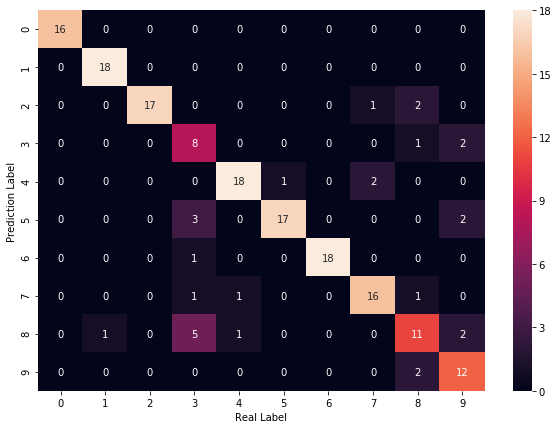

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:27 index:[4 5] real:5
#1 min_error:29 index:[2] real:2
#2 min_error:25 index:[8] real:8
#3 min_error:7 index:[0] real:0
#4 min_error:24 index:[1] real:1
#5 min_error:16 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:29 index:[3] real:3
#8 min_error:12 index:[2] real:2
#9 min_error:26 index:[1] real:1
#10 min_error:35 index:[2] real:7
#11 min_error:31 index:[7] real:4
#12 min_error:9 index:[6] real:6
#13 min_error:29 index:[3] real:3
#14 min_error:27 index:[1] real:1
#15 min_error:35 index:[3] real:3
#16 min_error:31 index:[5 7] real:9
#17 min_error:22 index:[1] real:1
#18 min_error:30 index:[7] real:7
#19 min_error:10 index:[6] real:6
#20 min_error:28 index:[8] real:8
#21 min_error:9 index:[4] real:4
#22 min_error:28 index:[3] real:3
#23 min_error:29 index:[1] real:1
#24 min_error:13 index:[4] real:4
#25 min_error:10 index:[0] real:0
#26 min_error:21 index:[5] real:5
#27 min_error:19 index:[3] real:3
#28 min_error:23 index:[6] real:6
#29 min_error:26 index:

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8855905998763142
Avg Base Learner:0.8029870129870129


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.09444444444444444
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.48333333333333334
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.55
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5555555555555556
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.6
Accuracy on training set: 0.6
Accuracy on training set: 0.6444444444444445
Ac

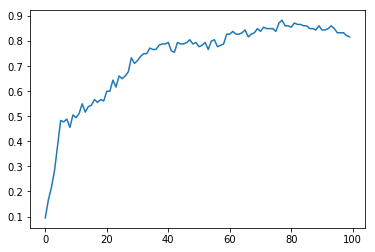

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.09444444444444444,
 0.16666666666666666,
 0.21666666666666667,
 0.2833333333333333,
 0.38333333333333336,
 0.48333333333333334,
 0.4777777777777778,
 0.4888888888888889,
 0.45555555555555555,
 0.5055555555555555,
 0.49444444444444446,
 0.5111111111111111,
 0.55,
 0.5166666666666667,
 0.5388888888888889,
 0.5444444444444444,
 0.5666666666666667,
 0.5555555555555556,
 0.5666666666666667,
 0.5611111111111111,
 0.6,
 0.6,
 0.6444444444444445,
 0.6166666666666667,
 0.6611111111111111,
 0.65,
 0.6611111111111111,
 0.6777777777777778,
 0.7333333333333333,
 0.7111111111111111,
 0.7222222222222222,
 0.7388888888888889,
 0.75,
 0.75,
 0.7722222222222223,
 0.7666666666666667,
 0.7666666666666667,
 0.7833333333333333,
 0.7888888888888889,
 0.7888888888888889,
 0.7944444444444444,
 0.7611111111111111,
 0.7555555555555555,
 0.7944444444444444,
 0.7888888888888889,
 0.7888888888888889,
 0.7944444444444444,
 0.8055555555555556,
 0.7888888888888889,
 0.7944444444444444,
 0.7777777777777778,
 0.78333